# TP1

## Apéndice: Visualizando conceptos

Muchas veces una visualización ayuda a comprender mejor los conceptos. Asi que vamos a dejarles documentado algunos trucos de *matplotlib* para pintar areas debajo de una curva. Eso nos va a permitir *ver* percentilos, y otros conceptos. 

 El truco es usar la funcion ``fill_between`` de matplotlib, que *pinta* el área delimitada por un rango de valores de ```x``` (y los valores de ```y``` que salgan de la función). 

En resumen:
```
fill_between(rango_x, funcion)
```

Vamos a usar la distribución normal, pero pueden adaptar el código para otras distribuciones.

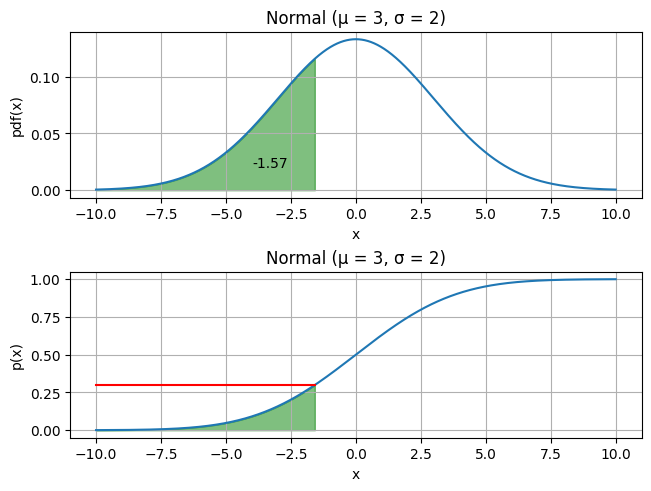

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

media = 0
sigma = 3

# creamos el objeto que contiene la distribución
normal = norm(loc=media, scale=sigma)

# inicializamos dos plots
fig, ax = plt.subplots(2, constrained_layout = True)
# para el primer plot usamos ax[0]
# para el segundo, ax[1]

# y vamos ploteando por partes
# 1 - la distribución 
x= np.arange(-10,10,0.001)
ax[0].plot(x, normal.pdf(x))
ax[0].set_title("Normal (µ = 3, σ = 2)")
ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf(x)')

# le ponemos una grilla
ax[0].grid(True)

# supongamos que queremos saber el valor de x tal que
# la probabilidad = 0.3, o sea el percentilo 30
x3 = normal.ppf(0.3)

# ahora pintamos la parte de la curva 
# generamos un rango x para pintar
rx = np.arange(-10, x3, 0.01) # el primer valor puede ser -infinito

# pintamos usando 'fill_between'
# pinta el rango x (rx en nuestro caso)
# debajo de la curva que le pasemos (normal.pdf(x) en nuestro caso)
# alpha = transparencia y color = ... bueno 
ax[0].fill_between(rx, normal.pdf(rx), alpha=0.5, color='g')

# podemos agregar texto tambien!
coordx = -4.0
coordy = 0.02
texto = round(x3,2)
ax[0].text(coordx,coordy,texto, fontsize=10)

# ahora ploteamos la funcion cumulativa
# esto lo hacemos en otro subplot (el ax[1])
ax[1].plot(x, normal.cdf(x))
ax[1].set_title("Normal (µ = 3, σ = 2)")
ax[1].set_xlabel('x')
ax[1].set_ylabel('p(x)')
ax[1].grid(True)


# y le pintamos la parte corespondiente de la curva
ax[1].fill_between(rx,normal.cdf(rx), alpha=0.5, color='g')

# y trazamos una linea 
# para ver mejor, je
xl, yl = [-10, x3], [0.3, 0.3] # entre dos puntos se genera una recta, 
ax[1].plot(xl, yl, color="red")

### Histograma asimétrico skewed izquierda con letras en la moda (A), la mediana (B) y el tercer cuartil (C)


<ipython-input-80-67f321b20d09>:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Moda = stats.mode(resultados_d).mode
<ipython-input-80-67f321b20d09>:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('Moda:', stats.mode(resultados_d).mode)


Promedio: 12.225344
Mediana: 10.0
Moda: [6]
Tercer cuartil (Q3): 18.0


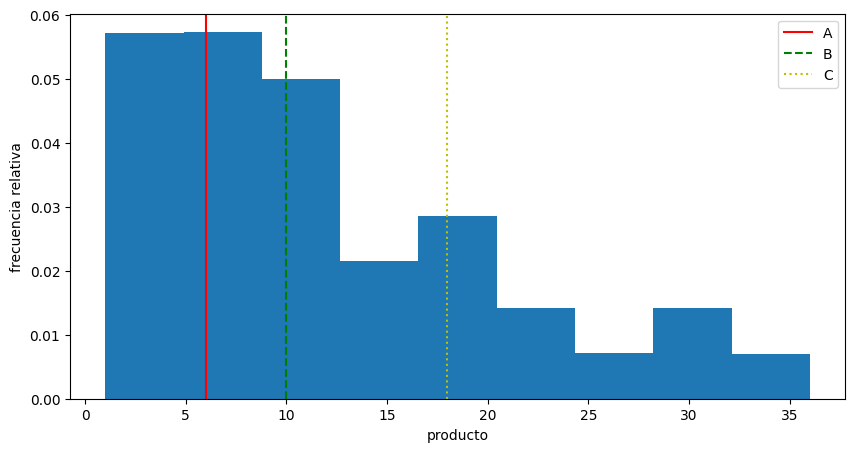

In [80]:
# Usamos el ejemplo anterior de producto de los resultados de dos dados
import numpy as np
from scipy import stats
import random
N_d = 500000      # número de experimentos
resultados_d = [] # lista en la que guardo resultados
#random.seed(4)

for i in range(N_d):
  caras = random.randint(1, 6) * random.randint(1, 6)
  resultados_d.append(caras)

# Calculemos las estadísticas
Promedio = np.mean(resultados_d)
Mediana = np.median(resultados_d)
Moda = stats.mode(resultados_d).mode
Q3 = np.quantile(resultados_d, 0.75)

print('Promedio:', np.mean(resultados_d))
print('Mediana:', np.median(resultados_d))
print('Moda:', stats.mode(resultados_d).mode)
print('Tercer cuartil (Q3):', Q3)

plt.figure(figsize = (10, 5))
# para que nos grafique el histograma normalizado
plt.hist(resultados_d, bins=9, density=True)
plt.axvline(Moda,color='r',linestyle='solid',label='A')
plt.axvline(Mediana,color='g',linestyle='dashed',label='B')
plt.axvline(Q3,color='y',linestyle='dotted',label='C')

plt.xlabel('producto')
plt.ylabel('frecuencia relativa')
plt.legend(loc='upper right')
plt.show()

### Histograma asimétrico skewed derecha con letras en la moda (A), la mediana (B) y el tercer cuartil (C)

<ipython-input-73-d630e5de2ef0>:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Moda = stats.mode(resultados_d).mode
<ipython-input-73-d630e5de2ef0>:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('Moda:', stats.mode(resultados_d).mode)


Promedio: 0.4084751794186559
Mediana: 0.4376586748096509
Moda: [0.46271503]
Tercer cuartil (Q3): 0.5145082282926765


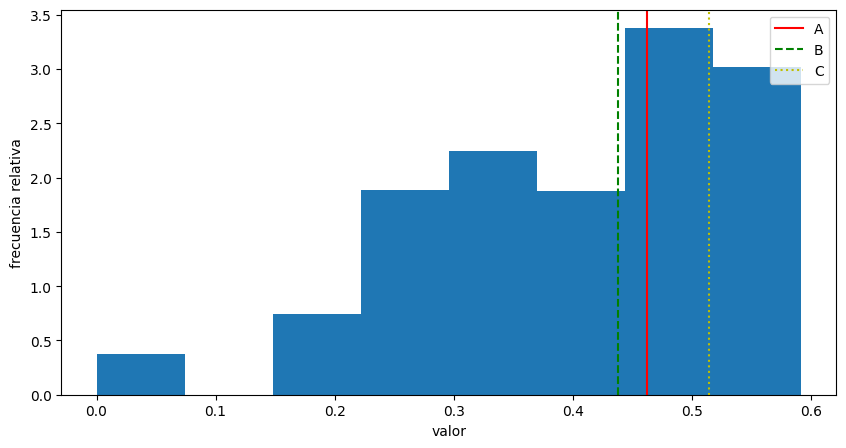

In [73]:
# Usamos el ejemplo anterior de producto de los resultados de dos dados
import numpy as np
from scipy import stats
import random
N_d = 500000      # número de experimentos
resultados_d = [] # lista en la que guardo resultados
#random.seed(4)

for i in range(N_d):
  caras = 1-(random.randint(1, 6) * random.randint(1, 6))**(-1.0/4)
  resultados_d.append(caras)

# Calculemos las estadísticas
Promedio = np.mean(resultados_d)
Mediana = np.median(resultados_d)
Moda = stats.mode(resultados_d).mode
Q3 = np.quantile(resultados_d, 0.75)

print('Promedio:', np.mean(resultados_d))
print('Mediana:', np.median(resultados_d))
print('Moda:', stats.mode(resultados_d).mode)
print('Tercer cuartil (Q3):', Q3)

plt.figure(figsize = (10, 5))
# para que nos grafique el histograma normalizado
plt.hist(resultados_d, bins=8, density=True)
plt.axvline(Moda,color='r',linestyle='solid',label='A')
plt.axvline(Mediana,color='g',linestyle='dashed',label='B')
plt.axvline(Q3,color='y',linestyle='dotted',label='C')

plt.xlabel('valor')
plt.ylabel('frecuencia relativa')
plt.legend(loc='upper right')
plt.show()
